## In-Class 34-1 - Installing and Running WeensyOS

In this assignment, we will understand the concepts that make this <b>safe sharing</b> of a computer's hardware possible. Many of these concepts are implemented inside a special software program that every computer runs: the <b>operating system</b>.

### Ensuring QEMU is running on your machine

WeensyOS can, in principle, run on any computer with an x86-64 CPU architecture (like yours, most likely). For this lab, however, you will run the OS in QEMU, a CPU emulator.

Before opening VS Code, go to the Docker Desktop and the running container. Open the Terminal/Exec tab. Then run the following commands:

    sudo apt update && sudo apt upgrade

> This command will likely take a few moments

Next, we will update our system to support virtualization.

    sudo apt install qemu-kvm libvirt-clients libvirt-daemon-system bridge-utils virtinst libvirt-daemon


    sudo apt -y install qemu-system-x86

## Installing Live Server

When you open VS Code and <i>before</i> you attach to the container, you will need to install Live Server.



## Create folder

<b>To review:</b>

<b>1.</b> Open Docker Desktop. Go to the cse20133-user Container you created. Press the Blue Triangle to start the Container.

<b>2.</b> Open VSCode, and on the left, select the blue button in the bottom left of VSCode. At the top, select the pull-down choice “Attach to running container” and select your CSE 20133 course container.

<b>3.</b> Go into your Git Folder:

> Recall that @USERNAME is the unique username you created when you created your GitHub account. You will see your user name in the VS Code Docker

    cd cse20133-user/cse20133-@USERNAME

Create the folder:

    mkdir lec37
    cd lec37
    
    
### Obtaining the class files

Perform the following command:

    wget https://raw.githubusercontent.com/mmorri22/cse20133/main/inclass/lec37/setup.sh
    chmod a+rx setup.sh
    ./setup.sh
    
Once you perform these commands, you will get the following when you perform <code>ls *</code>

    > ls *
    boot.cc      GNUmakefile  k-exception.S   k-vmiter.cc  log.txt         README.md     u-lib.hh
    bootentry.S  k-apic.hh    k-hardware.cc   k-vmiter.hh  p-allocator.cc  README-OS.md  x86-64.h
    COPYRIGHT    kernel.cc    k-memviewer.cc  lib.cc       p-fork.cc       types.h
    elf.h        kernel.hh    k-pci.hh        lib.hh       p-forkexit.cc   u-lib.cc

    build:
    findccprefix.sh  functions.gdb  mkchickadeesymtab.cc  qemu-nograb.c  weensyos.gdb
    findgcc.sh       mkbootdisk.cc  mkkernelasm.awk       rules.mk

    link:
    boot.ld  kernel.ld  p-allocator2.ld  p-allocator3.ld  p-allocator4.ld  process.ld  shared.ld
    
In that folder run the following command:

    make run
    
You will get a pop up, be sure to select <b>Preview in Editor</b> and <i>not</i> Open in Browser.

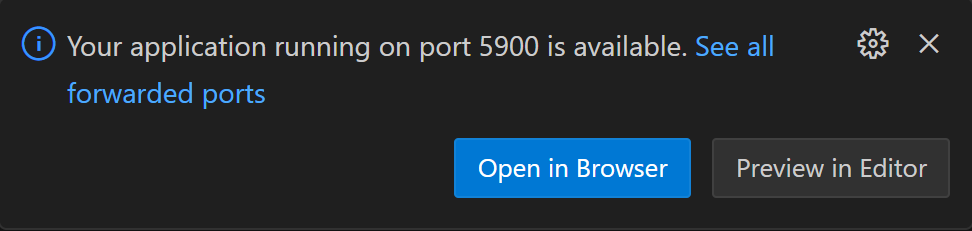

You will initially see a white screen. Close out of that Editor, and then press Ctrl-C in the Terminal.

## Starting Processes in WeensyOS

Now let’s start some processes! Unlike the OS on your computer, the basic WeensyOS we’re using for this lab does not allow the user to specify what program they would like to run. Instead, it will run a fixed set of programs at bootup.

Take a look at the <code>process_setup</code> function in <code>kernel.cc</code>:

    void process_setup(pid_t pid, const char* program_name)

This function is responsible for setting up kernel state for a new userspace process.

> For example, it loads the program (via the program_loader, an ELF binary loader we’re providing you with). It then sets the instruction pointer and stack pointers, and finally marks the new process as runnable. 


### Task: In the <code>kernel</code> function in <code>kernel.cc</code>, we’ll call process_setup to set up a new process:

<ol>
    <li>Remove the <code>console_printf</code> call in the <code>kernel</code> function at Line 86, and instead add a call to <code>process_setup</code> with these parameters:</li>
    <ul>
        <li><code>pid_t pid</code>: You will need to pass a process ID (PID). PIDs for user processes will start at 1, as the kernel is PID 0.</li>
        <li><code>const char* program_name</code>: Use "<code>allocator</code>" as your program_name. For example, when asked to load "<code>allocator</code>" into memory, the program loader will load compiled source code based on "<code>p-allocator.cc</code>" into a specific address of physical memory.</li>
    </ul>
    <li>Tell the kernel to actually run a process and jump to user mode. For that, call <code>run(&ptable[1])</code>, which starts PID 1.</li>
</ol>


Acknowledgements: WeensyOS was originally developed for Harvard’s <a href = "https://cs61.seas.harvard.edu/site/2023/#gsc.tab=0">CS 61</a> course. This lab was developed for CSE 20133